# Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. The customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Train file: CSVcontaining the customers for whom loan eligibility is known as 'Loan_Status'.
##  Test file: CSVcontaining the customer information for whom loan eligibility is to be predicted
# Data Dictionary

* Loan_ID:	Unique Loan ID
* Gender:	Male/ Female
* Married:	Applicant married (Y/N)
* Dependents	Number of dependents
* Education	Applicant Education (Graduate/ Under Graduate)
* Self_Employed	Self employed (Y/N)
* ApplicantIncome	Applicant income
* Coapplicant Income: Income of coapplicant
* LoanAmount:	Loan amount in thousands
* Loan_Amount_Term:	Term of loan in months
* Credit_History:	Credit history meets guidelines
* Property_Area:	Urban/ Semi Urban/ Rural
* Loan_Status(Target): Loan approved (Y/N)

#### Loan_Status(Target) Loan approved (Y/N) is missing in test file since it is the Target.
# Submission file format: 
* Variable	Description
* Loan_ID	Unique Loan ID
* Loan_Status	(Target) Loan approved (Y/N)

# Import the libraries

In [335]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

# Load Data

In [338]:
train = pd.read_csv('train_ctrUa4K.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [340]:
test = pd.read_csv('test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Data Preprocessing 1

In [343]:
train.drop(columns=['Loan_ID'],inplace = True)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Find total number of rows and columns

In [346]:
print("No.of rows in train data:",train.shape[0])
print("No.of columns in train data:",train.shape[1])
print("No.of rows in test data:",test.shape[0])
print("No.of columns in test data:",test.shape[1])

No.of rows in train data: 614
No.of columns in train data: 12
No.of rows in test data: 367
No.of columns in test data: 12


# Check for duplicate rows

In [349]:
train.duplicated().sum()

0

In [351]:
test.duplicated().sum()

0

# Find data type of each column and memory usage

In [354]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [356]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [358]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [360]:
train['Credit_History'].fillna(0)
train['Self_Employed'].fillna('No')
train['LoanAmount'].fillna(0)
train['Dependents'].fillna('other')
train['Loan_Amount_Term'].fillna(0)
train['Gender'].fillna('other')
train['Married'].fillna('other')

train.fillna({
    'Credit_History': 0,
    'Self_Employed': 'No',
    'LoanAmount': 0,
    'Dependents': 'other',
    'Loan_Amount_Term': 0,
    'Gender': 'other',
    'Married': 'other',
}, inplace=True)

In [362]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [364]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [366]:
test['Credit_History'].fillna(0)
test['Self_Employed'].fillna('No')
test['LoanAmount'].fillna(0)
test['Dependents'].fillna('other')
test['Loan_Amount_Term'].fillna(0)
test['Gender'].fillna('other')
test['Married'].fillna('other')

test.fillna({
    'Credit_History': 0,
    'Self_Employed': 'No',
    'LoanAmount': 0,
    'Dependents': 'other',
    'Loan_Amount_Term': 0,
    'Gender': 'other',
    'Married': 'other',
}, inplace=True)

In [368]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='Loan_Status', ylabel='count'>

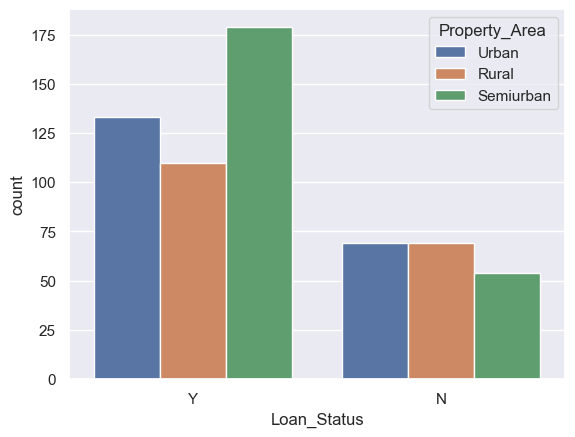

In [371]:
sns.countplot(data=train, x="Loan_Status",hue="Property_Area")
#people with SemiUrban has high acceptable chance of Loan Status

<Axes: xlabel='Loan_Status', ylabel='count'>

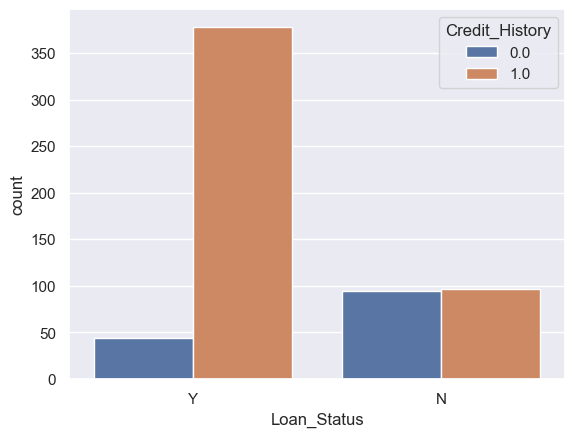

In [372]:
sns.countplot(data=train, x="Loan_Status",hue="Credit_History")
#people with accepatable past credit history are most likely accepted to new loan

<Axes: xlabel='Loan_Status', ylabel='count'>

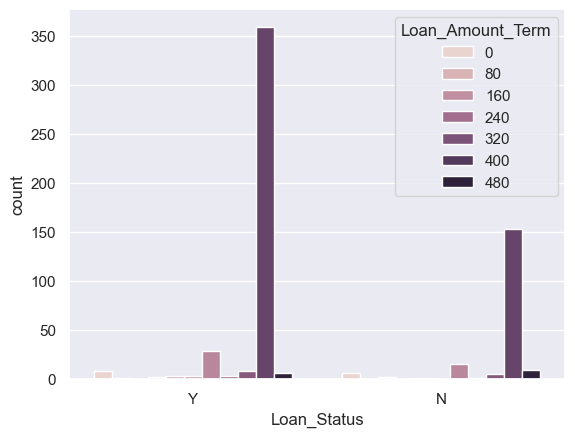

In [373]:
sns.countplot(data=train, x="Loan_Status",hue="Loan_Amount_Term")
#people with 360 month loan term are most likely to be acceptable

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

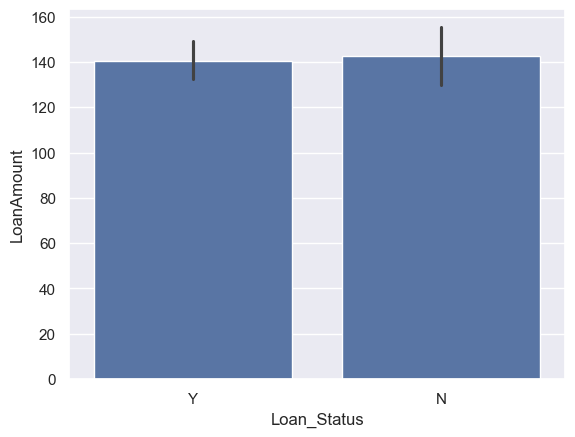

In [375]:
sns.barplot(data=train, x="Loan_Status",y="LoanAmount")

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

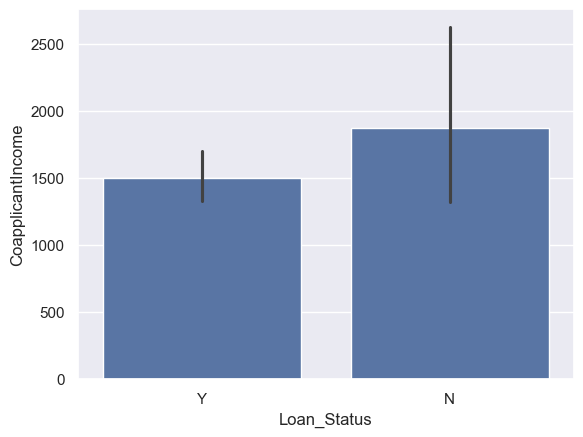

In [376]:
sns.barplot(data=train, x="Loan_Status",y="CoapplicantIncome")
#pwople with high coapplicant income are most not accepted to new loan

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

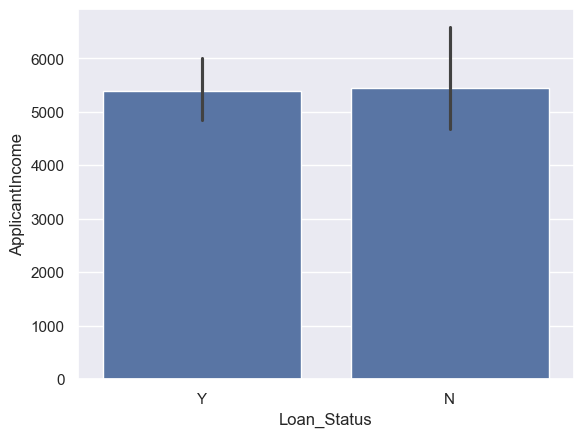

In [378]:
sns.barplot(data=train, x="Loan_Status",y="ApplicantIncome")

<Axes: xlabel='Loan_Status', ylabel='count'>

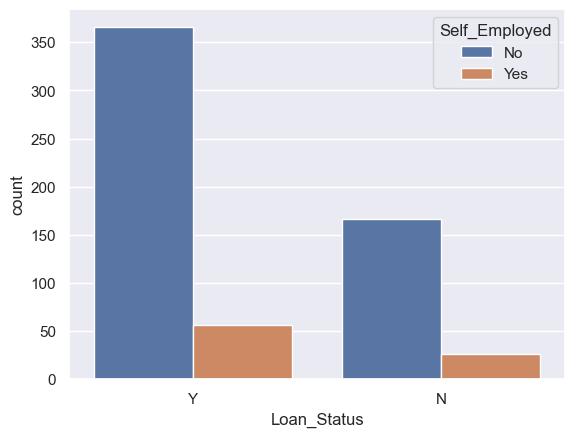

In [379]:
sns.countplot(data=train, x="Loan_Status",hue="Self_Employed")

<Axes: xlabel='Loan_Status', ylabel='count'>

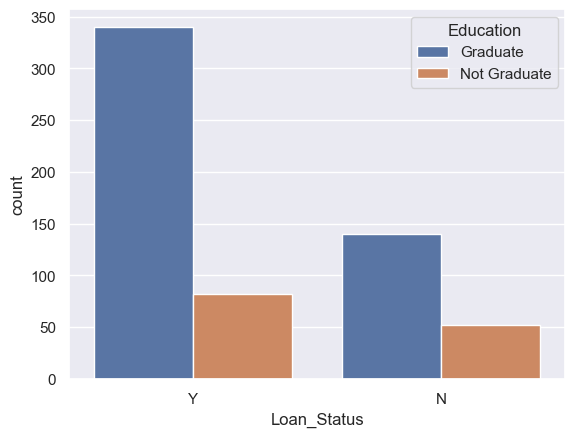

In [380]:
sns.countplot(data=train, x="Loan_Status",hue="Education")

<Axes: xlabel='Loan_Status', ylabel='count'>

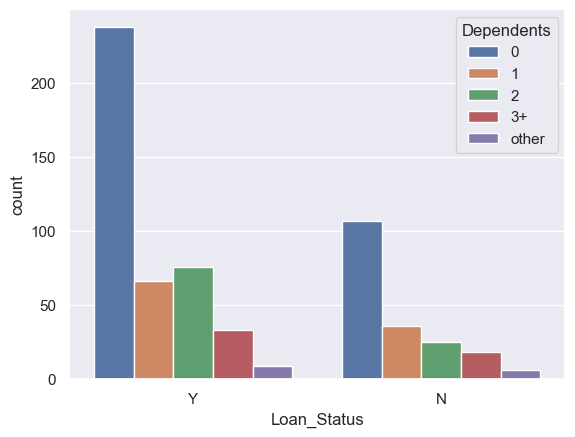

In [381]:
sns.countplot(data=train, x="Loan_Status",hue="Dependents")

<Axes: xlabel='Loan_Status', ylabel='count'>

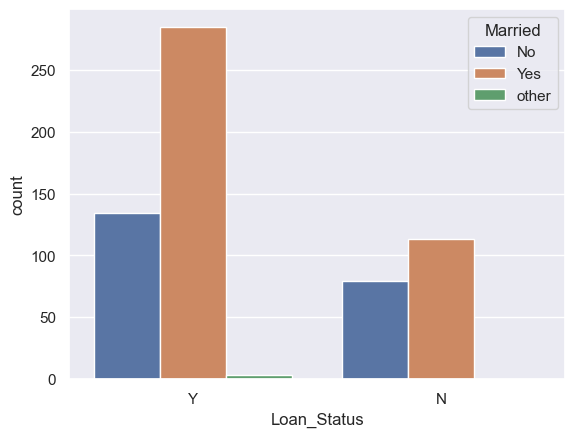

In [383]:
sns.countplot(data=train, x="Loan_Status",hue="Married")
#people who are married are ore acceptable to new loan

<Axes: xlabel='Loan_Status', ylabel='count'>

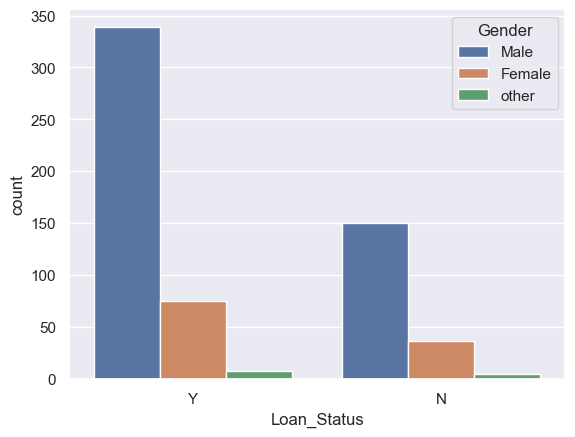

In [384]:
sns.countplot(data=train, x="Loan_Status",hue="Gender")

# Data Preprocessing 2

In [387]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [388]:
train['Gender'].unique()

array(['Male', 'Female', 'other'], dtype=object)

In [389]:
train['Married'].unique()

array(['No', 'Yes', 'other'], dtype=object)

In [390]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', 'other'], dtype=object)

In [391]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [392]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [394]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [397]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [399]:
train['Loan_Amount_Term'].unique()

array([360., 120., 240.,   0., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [400]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Gender']= label_encoder.fit_transform(train['Gender'])
train['Gender'].unique()

array([1, 0, 2])

In [401]:
train['Married']= label_encoder.fit_transform(train['Married'])
train['Married'].unique()

array([0, 1, 2])

In [402]:
train['Dependents']= label_encoder.fit_transform(train['Dependents'])
train['Dependents'].unique()

array([0, 1, 2, 3, 4])

In [404]:
train['Education']= label_encoder.fit_transform(train['Education'])
train['Education'].unique()

array([0, 1])

In [406]:
train['Self_Employed']= label_encoder.fit_transform(train['Self_Employed'])
train['Self_Employed'].unique()

array([0, 1])

In [407]:
train['Property_Area']= label_encoder.fit_transform(train['Property_Area'])
train['Property_Area'].unique()

array([2, 0, 1])

In [408]:
train['Loan_Amount_Term']= label_encoder.fit_transform(train['Loan_Amount_Term'])
train['Loan_Amount_Term'].unique()

array([ 9,  5,  7,  0,  6,  3,  8, 10,  2,  4,  1], dtype=int64)

In [410]:
# Apply label encoding to multiple columns
train[['Gender', 'Married', 'Dependents', 'Education', 
      'Self_Employed', 'Property_Area', 'Loan_Amount_Term']] = train[
          ['Gender', 'Married', 'Dependents', 'Education', 
           'Self_Employed', 'Property_Area', 'Loan_Amount_Term']
      ].apply(label_encoder.fit_transform)

# To check unique values for encoded columns
print(train[['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area', 'Loan_Amount_Term']])

     Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     Loan_Amount_Term  
0                   9  
1                   9  
2  

In [427]:
# Apply label encoding to multiple columns
test[['Gender', 'Married', 'Dependents', 'Education', 
      'Self_Employed', 'Property_Area', 'Loan_Amount_Term']] = test[
          ['Gender', 'Married', 'Dependents', 'Education', 
           'Self_Employed', 'Property_Area', 'Loan_Amount_Term']
      ].apply(label_encoder.fit_transform)

# To check unique values for encoded columns
print(test[['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area', 'Loan_Amount_Term']])

     Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        1           0          0              0              2   
1         1        1           1          0              0              2   
2         1        1           2          0              0              2   
3         1        1           2          0              0              2   
4         1        0           0          1              0              2   
..      ...      ...         ...        ...            ...            ...   
362       1        1           3          1              1              2   
363       1        1           0          0              0              2   
364       1        0           0          0              0              1   
365       1        1           0          0              0              0   
366       1        0           0          0              1              0   

     Loan_Amount_Term  
0                  11  
1                  11  
2  

## Outlier Handling

<Axes: xlabel='ApplicantIncome'>

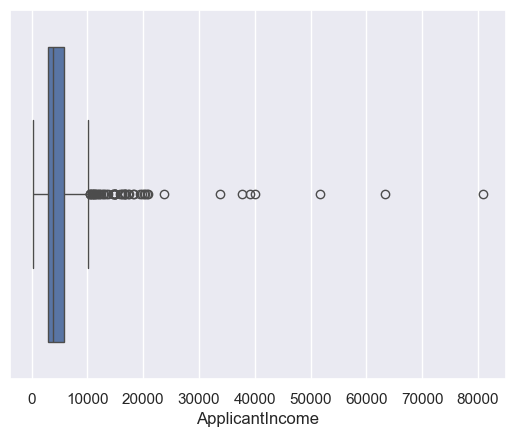

In [431]:
sns.boxplot(x=train["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome'>

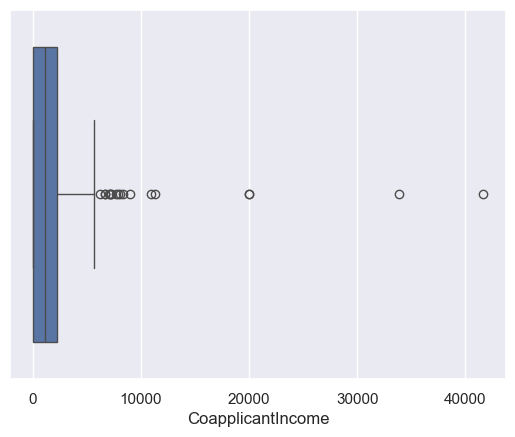

In [432]:
sns.boxplot(x=train["CoapplicantIncome"])

<Axes: xlabel='LoanAmount'>

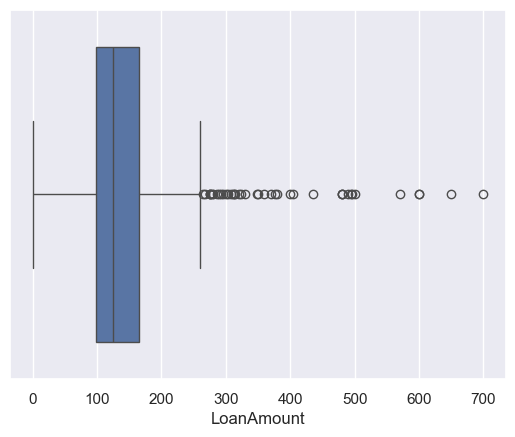

In [433]:
sns.boxplot(x=train["LoanAmount"])

In [434]:
train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

# Balanced Class Data

## Data Correlation

In [ ]:
sns.heatmap(train.corr(), fmt='.2g')

# Standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
std_scale = StandardScaler()

# Fit the scaler on the training data
std_scale.fit(train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

# Transform both the training and test data using the fitted scaler
train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = std_scale.transform(train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = std_scale.transform(test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [479]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,0.0,9,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.0,9,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,9,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,9,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,9,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,9,1.0,0,Y
610,1,1,3,0,0,4106,0.0,40.0,6,1.0,0,Y
611,1,1,1,0,0,8072,240.0,253.0,9,1.0,2,Y
612,1,1,2,0,0,7583,0.0,187.0,9,1.0,2,Y


In [481]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,11,1.0,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,11,1.0,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,11,1.0,2,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,11,0.0,2,0
4,LP001051,1,0,0,1,0,3276,0,78.0,11,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,11,1.0,2,1
363,LP002975,1,1,0,0,0,4158,709,115.0,11,1.0,2,1
364,LP002980,1,0,0,0,0,3250,1993,126.0,11,0.0,1,0
365,LP002986,1,1,0,0,0,5000,2393,158.0,11,1.0,0,0


## Machine Learning Model Building

In [486]:
X = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

## Random Forest

In [489]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [491]:
rfc.fit(X, y)

# Make predictions on the test data
y_pred_rfc = rfc.predict(test.drop(['Loan_ID','Loan_Status'],axis=1))

In [493]:
test['Loan_Status']=y_pred_rfc
test[['Loan_ID','Loan_Status']].to_csv('loan_Prediction_rfc.csv',index=False)


In [495]:
import os
print(os.getcwd())

C:\Users\sulai\Downloads
